In [495]:
# import libraries
import pandas as pd
import scipy.stats
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# disable warnings, use w caution
import warnings
warnings.filterwarnings('ignore')

# project specific libs
import os
import matplotlib.pyplot as plt
import pathlib

In [496]:
# project specific path
path = '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/'

##### Meta Analyses Setup #####

In [497]:
# define replacements prior to analysis
sub_dict=  {'healthy control': 'HC',
            'healthy': 'HC',
            'Healthy': 'HC',
            'HLT': 'HC',
            'NORA':'RA',
            'SLE-G': 'SLE',
            'axial spondyloarthritis': 'AxSpA',
            'sle': 'SLE',
            'ss': 'SjD',
            'psa': 'PsA',
            'pso': 'PsO',
            'nss': 'NSS',
            'non-sjogrens sicca': 'NSS',
            'pSS patients without treament': 'SjD'
           }

dx_sub_dict = {'host_disease':'Diagnosis'}

### all data
j_to_res = {
    # AMP AIM
    'jobs09': {
        'Diagnosis': 'RA',
        'Cohort': 'AMPAIM',
        # 'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs09/lefse_results.res'
        'LEfSe_path': path + '/outputs/jobs52/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis-RA-or-healthy.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + '/outputs/jobs52/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis-RA-or-healthy.Diagnosis.NA.tsv'
    },
    'jobs10':{
        'Diagnosis': 'PsO',
        'Cohort': 'AMPAIM',
        # 'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs10/lefse_results.res'
        'LEfSe_path': path + '/outputs/jobs52/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis-pso-or-healthy.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + '/outputs/jobs52/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis-pso-or-healthy.Diagnosis.NA.tsv'
    },
    'jobs11':{
        'Diagnosis': 'PsA',
        'Cohort': 'AMPAIM',
        # 'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs11/lefse_results.res'
        'LEfSe_path': path + '/outputs/jobs52/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis-psa-or-healthy.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + '/outputs/jobs52/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis-psa-or-healthy.Diagnosis.NA.tsv'
    },
    'jobs12':{
        'Diagnosis': 'SjD',
        'Cohort': 'AMPAIM',
        # 'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs12/lefse_results.res'
        'LEfSe_path': path + '/outputs/jobs52/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis-healthy-or-ss.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + '/outputs/jobs52/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis-healthy-or-ss.Diagnosis.NA.tsv'
    },
    'jobs13':{
        'Diagnosis': 'SLE',
        'Cohort': 'AMPAIM',
        # 'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs13/lefse_results.res'
        'LEfSe_path': path + '/outputs/jobs52/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis-healthy-or-sle.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + '/outputs/jobs52/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis-healthy-or-sle.Diagnosis.NA.tsv'
    },
    'jobs14':{
        'Diagnosis': 'NSS',
        'Cohort': 'AMPAIM',
        # 'LEfSe_path': '/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs14/lefse_results.res'
        'LEfSe_path': path + '/outputs/jobs52/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis-healthy-or-nss.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + '/outputs/jobs52/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis-healthy-or-nss.Diagnosis.NA.tsv'
    },
    # Validation
    'jobs41':{ # Weird SLE cohort
        'Diagnosis': 'SLE', 
        'Cohort': 'Valid1SLE',
        'LEfSe_path': path + 'outputs/jobs41/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis-HC-or-SLE-G.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + '/outputs/jobs41/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis-HC-or-SLE-G.Diagnosis.NA.tsv'
    },
    'jobs43':{
        'Diagnosis': 'AxSpA',
        'Cohort': 'Valid2AxSpA',
        'LEfSe_path': path + 'outputs/jobs43/Analysis_lefse_0/results/host_disease/lefse_results.taxa_table_L7.host_disease.NA.tsv',
        'LEfSe_pc2_path': path + 'outputs/jobs43/Analysis_lefse_picrust2_0/results/host_disease/lefse_results.picrust2_briteko.host_disease.NA.tsv'
    },
    'jobs44':{
        'Diagnosis': 'SjD',
        'Cohort': 'Valid3SjD',
        'LEfSe_path': path + 'outputs/jobs44/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + 'outputs/jobs44/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis.NA.tsv'
    },
    'jobs45':{
        'Diagnosis': 'PsO',
        'Cohort': 'Valid5PsO',
        'LEfSe_path': path + 'outputs/jobs45/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + 'outputs/jobs45/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis.NA.tsv'
    },
    'jobs46':{
        'Diagnosis': 'RA',
        'Cohort': 'Valid4RA',
        'LEfSe_path': path + 'outputs/jobs46/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + 'outputs/jobs46/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis.NA.tsv'
    },
    'jobs47':{
        'Diagnosis': 'PsO',
        'Cohort': 'Valid8PsO',
        'LEfSe_path': path + 'outputs/jobs47/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + 'outputs/jobs47/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis.NA.tsv'
    },
    'jobs48':{
        'Diagnosis': 'SLE',
        'Cohort': 'Valid6SLE',
        'LEfSe_path': path + 'outputs/jobs48/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + 'outputs/jobs48/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis.NA.tsv'
    },
    'jobs49':{
        'Diagnosis': 'RA',
        'Cohort': 'Valid7RA',
        'LEfSe_path': path + 'outputs/jobs49/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis-HLT-or-NORA.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + 'outputs/jobs49/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis-HLT-or-NORA.Diagnosis.NA.tsv'
    },
    'jobs50':{
        'Diagnosis': 'PsO',
        'Cohort': 'Valid10PsO',
        'LEfSe_path': path + 'outputs/jobs50/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + 'outputs/jobs50/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis.NA.tsv'
    },
    'jobs51':{
        'Diagnosis': 'PsO',
        'Cohort': 'Valid9PsD',
        'LEfSe_path': path + 'outputs/jobs51/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis-PsO-or-HC.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + 'outputs/jobs51/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis-PsO-or-HC.Diagnosis.NA.tsv'
    },
    'jobs52':{
        'Diagnosis': 'AIMD',
        'Cohort': 'AMPAIM'
        #'LEfSe_path': path + 'outputs/jobs51/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis-PsO-or-HC.Diagnosis.NA.tsv',
        #'LEfSe_pc2_path': path + 'outputs/jobs51/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis-PsO-or-HC.Diagnosis.NA.tsv'
    },
    'jobs53':{
        'Diagnosis': 'PsA',
        'Cohort': 'Valid9PsD',
        'LEfSe_path': path + 'outputs/jobs51/Analysis_lefse_0/results/Diagnosis/lefse_results.taxa_table_L7.Diagnosis-PsA-or-HC.Diagnosis.NA.tsv',
        'LEfSe_pc2_path': path + 'outputs/jobs51/Analysis_lefse_picrust2_0/results/Diagnosis/lefse_results.picrust2_briteko.Diagnosis-PsA-or-HC.Diagnosis.NA.tsv'
    }


}


##### Process LEfSe results prior to UpSetR #####

In [498]:
# for AMPAIM
# taxa analyses and pathway analyses
jobs = ['jobs09', 'jobs10', 'jobs11', 'jobs12', 'jobs13', 'jobs14']
jobs = ['jobs' + str(i) for i in range(43,52)]# , 'jobs10', 'jobs11', 'jobs12', 'jobs13', 'jobs14']
jobs = ['jobs43', 'jobs45', 'jobs46', 'jobs47', 'jobs48', 'jobs49', 'jobs50', 'jobs51', 'jobs53']

# fix jobs41, jobs44

#for j in j_to_res:
for j in jobs:
    # grab res dict
    res = j_to_res[j]

    # grab df and name columns
    #if '.res' in res['LEfSe_path']:
    #    header = None
    #elif '.taxa' in res['LEfSe_path']:
    header = 0
    
    df_lefse = pd.read_csv(res['LEfSe_path'], sep='\t', header=header, names =['Taxa','X','Direction','LDA','p'])
   
    # drop na
    df_lefse = df_lefse[df_lefse['p'] != '-']
    
    # cast to float
    df_lefse['p'] = df_lefse['p'].astype(float)

    # filter on NA 
    df_lefse = df_lefse[~np.isnan(df_lefse['LDA'])]

    # save
    for d in df_lefse.Direction.unique():    
        df = df_lefse[df_lefse['Direction'] == d] 
        df.to_csv(path + 'outputs/jobs100/' + res['Cohort'] + '_' + res['Diagnosis'] + '_' + d + '.tsv', sep='\t')

    # pathways
    df_lefse = pd.read_csv(res['LEfSe_pc2_path'], sep='\t', header=header, names =['Pathway','X','Direction','LDA','p'])
   
    # drop na
    df_lefse = df_lefse[df_lefse['p'] != '-']
    
    # cast to float
    df_lefse['p'] = df_lefse['p'].astype(float)

    # filter on NA 
    df_lefse = df_lefse[~np.isnan(df_lefse['LDA'])]

    # save
    for d in df_lefse.Direction.unique():    
        df = df_lefse[df_lefse['Direction'] == d] 
        df.to_csv(path + 'outputs/jobs101/' + res['Cohort'] + '_' + res['Diagnosis'] + '_' + d + '.tsv', sep='\t')
        

#df = df[np.isnan(df['LDA'])]
#LDAnan = df.Taxa.values

# print(LDAnan)
df.head()


,Pathway,X,Direction,LDA,p
17,Metabolism.Lipid_metabolism.Glycerolipid_metab...,3.655125,HC,2.479802,0.010115
23,Metabolism.Amino_acid_metabolism.Cysteine_and_...,4.186788,HC,2.491334,0.046638
180,Cellular_Processes.Cellular_community___prokar...,4.436168,HC,3.213395,0.019846
218,Environmental_Information_Processing.Membrane_...,4.871017,HC,3.640533,0.032749
236,Cellular_Processes.Cellular_community___prokar...,4.299531,HC,3.201907,0.008782


##### jobs39 #####

In [27]:
# jobs39 is where the first PRJNA will be tested, 16S sequencing
# PRJNA317370
# we need to generate a Q2 mapping file like in OA
q2_oa = pd.read_csv(path + 'outputs/jobs39/oaq2.tsv', sep='\t')

# take columns i think we need
keep = ['BarcodeSequence','LinkerPrimerSequence']

# grab sample IDs
# df_map = q2_oa.loc[:,keep]

df_sra = pd.read_csv(path + 'outputs/jobs39/SraRunTable.txt', sep='\t')
df_sra = df_sra.rename(columns={'Run':'#SampleID'})

# insert in reverse order
for i in keep:
    df_sra.insert(1, i, ['NA' for _ in range(len(df_sra))])

df_sra.to_csv(path + 'outputs/jobs39/qiime_mapping_file.tsv', sep='\t')
df_sra.columns.values
# df_sra['Sample Name']

array(['#SampleID', 'LinkerPrimerSequence', 'BarcodeSequence',
       'Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample',
       'BioSampleModel', 'Bytes', 'Center Name', 'collection_date',
       'Consent', 'DATASTORE filetype', 'DATASTORE provider',
       'DATASTORE region', 'Experiment', 'geo_loc_name_country',
       'geo_loc_name_country_continent', 'geo_loc_name', 'host',
       'Instrument', 'isolation_source', 'lat_lon', 'Library Name',
       'LibraryLayout', 'LibrarySelection', 'LibrarySource', 'Organism',
       'Platform', 'ReleaseDate', 'create_date', 'version', 'Sample Name',
       'SRA Study', '1-Methylhistidine', '3-Methylhistidine', 'Alanine',
       'allo-Isoleucine', 'alpha-Amino-N-butyric-acid',
       'alpha-Aminoadipic-acid', 'Anserine', 'Arginine', 'Asparagine',
       'Aspartic_Acid', 'beta-Alanine', 'beta-Aminoisobutyric-acid',
       'betaine', 'carnitine', 'Carnosine', 'choline', 'Citrulline',
       'Cystathionine_1', 'Cystathionine_2', 'Cystin

##### jobs43 #####

In [290]:
# jobs43
df = pd.read_csv(path + 'outputs/jobs43/SraRunTable.txt', sep='\t')

# create host subject ID col
df['HostSubjectId'] = df['Run']
df = df.set_index('Run')

# we have misc_param_uveitis_activity misc_param_nsaids_use misc_param_basdai_score	misc_param_biologic_use
# we also have oral data
df = df[df['Organism'] == 'human gut metagenome']

# grab iga presort col
df = df[df['misc_param_iga_fraction'] == 'Allbac']

# get diagnosis column
df['Diagnosis'] = df['host_disease'].map(lambda x: 'AxSpA' if 'axial' in x else 'HC')

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('Run')
df.index.name = '#SampleID'

# export
df.to_csv(path + 'outputs/jobs43/qiime_mapping_file.tsv', sep='\t')

# check breakdown
df.Diagnosis.value_counts()

# df.head()

Diagnosis
AxSpA          14
HC             11
categorical     1
Name: count, dtype: int64

##### jobs44 #####

In [148]:
# create mapping file
df = pd.read_csv(path + 'outputs/jobs44/gutonlyCRR.csv')
df = df[df['Run title'].str.contains('fecal')]
df = df.set_index('Accession')

# get diagnosis column
df['DiagnosisOG'] = df['Run title'].map(lambda x: x.split('sample:')[-1])

# create new simplified one
df = df[df['DiagnosisOG'].isin(['healthy control','pSS patients without treament'])]
# pSS patients without treament            90
# pSS patients with 3-6 month treament     46
# non-pSS patient                          43
# healthy control                          40
# pSS patients with 6-12 month treament    11                       

# create new diagnosis
df['Diagnosis'] = df['DiagnosisOG'].map({'healthy control': 'HC', 'pSS patients without treament': 'SjD'})

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('Accession')
df.index.name = '#SampleID'

# create host subject id
df['HostSubjectId'] = df['ID']

# drop "ID" it is protected in QIIME
df = df.drop('ID',axis=1)

# export
df.to_csv(path + 'outputs/jobs44/qiime_mapping_file.tsv', sep='\t')
df.head()

,Run title,BioProject accession,Experiment accession,Run data file type,Read filename 1,Read file1 MD5,DownLoad Read file1,Read filename 2,Read file2 MD5,DownLoad Read file2,...,Reference file name,MD5 for reference file,Assembly Name or Accession,Assembly Accession URL,other_db,accession_in_other_db,other_db_url,DiagnosisOG,Diagnosis,HostSubjectId
#SampleID,,,,,,,,,,,,,,,,,,,,,
#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,...,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical
CRR442600,D8:Amplicon sequence of human fecal sample:pSS...,PRJCA008752,CRX385346,fastq,CRR442600_f1.fq.gz (12975507 bytes),3149e0d5588d0cea4b58c1a2706c7e43,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,CRR442600_r2.fq.gz (12152647 bytes),038b8b7280f629bba6e6fa50eb5b78f2,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pSS patients without treament,SjD,8
CRR442603,D11:Amplicon sequence of human fecal sample:pS...,PRJCA008752,CRX385349,fastq,CRR442603_f1.fq.gz (10712320 bytes),854db81c703df4130019c80e717ccad7,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,CRR442603_r2.fq.gz (10213484 bytes),692bcab19cb7f412000af2869de5355f,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pSS patients without treament,SjD,11
CRR442606,D14:Amplicon sequence of human fecal sample:pS...,PRJCA008752,CRX385352,fastq,CRR442606_f1.fq.gz (11509869 bytes),aa3c4d14208bb22f40b7a1813fe5c4fc,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,CRR442606_r2.fq.gz (11022278 bytes),49cdb6984acb61ce32e31d7851bf9468,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pSS patients without treament,SjD,14
CRR442608,D16:Amplicon sequence of human fecal sample:pS...,PRJCA008752,CRX385354,fastq,CRR442608_f1.fq.gz (12899732 bytes),6fb9bfd4498e608a33d0bfdcbbf32c48,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,CRR442608_r2.fq.gz (12309020 bytes),8491d2cd4dfe9d639f256b307f459eda,ftp://download.big.ac.cn/gsa/CRA006415/CRR4426...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pSS patients without treament,SjD,16


##### Jobs 45 #####

In [441]:
# jobs45
df = pd.read_csv(path + 'outputs/jobs45/SraRunTable.txt', sep='\t')

# create host subject ID col
df['HostSubjectId'] = df['Run']
df = df.set_index('Run')

# get diagnosis column
df['Diagnosis'] = df['Sample Name'].map(lambda x: 'PsO' if 'PSORI' in x else 'HC')

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('Run')
df.index.name = '#SampleID'

# export
df.to_csv(path + 'outputs/jobs45/qiime_mapping_file.tsv', sep='\t')

# check breakdown
print(df.Diagnosis.value_counts())
df.head()

Diagnosis
PsO            39
HC             21
categorical     1
Name: count, dtype: int64


,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,collection_date,common_name,Consent,...,SRA Study,AGE,organism,ENA_first_public,INSDC_center_name,INSDC_status,Sample_name,Submitter_Id,HostSubjectId,Diagnosis
#SampleID,,,,,,,,,,,,,,,,,,,,,
#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,...,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical
ERR13362272,AMPLICON,549,32847115,PRJEB77172,SAMEA115830069,19117480,INSTITUTE OF AGROCHEMISTRY AND FOOD TECHNOLOGY,not provided,human,public,...,ERP161650,63.0,Homo sapiens,NaN,NaN,NaN,NaN,NaN,ERR13362272,PsO
ERR13362276,AMPLICON,548,45884959,PRJEB77172,SAMEA115830073,27224047,INSTITUTE OF AGROCHEMISTRY AND FOOD TECHNOLOGY,not provided,human,public,...,ERP161650,53.0,NaN,1000-01-01,IATA-CSIC,public,HPSORIH0A07,HPSORIH0A07,ERR13362276,HC
ERR13362278,AMPLICON,548,30586893,PRJEB77172,SAMEA115830075,17523646,INSTITUTE OF AGROCHEMISTRY AND FOOD TECHNOLOGY,not provided,human,public,...,ERP161650,47.0,NaN,1000-01-01,IATA-CSIC,public,HPSORIH0A09,HPSORIH0A09,ERR13362278,HC
ERR13362280,AMPLICON,550,34410414,PRJEB77172,SAMEA115830077,20162171,INSTITUTE OF AGROCHEMISTRY AND FOOD TECHNOLOGY,not provided,human,public,...,ERP161650,44.0,NaN,1000-01-01,IATA-CSIC,public,HPSORIH0A11,HPSORIH0A11,ERR13362280,HC


##### jobs46 #####

In [469]:
# jobs46
df = pd.read_csv(path + 'outputs/jobs46/SraRunTable.txt', sep='\t')

# create host subject ID col
df['HostSubjectId'] = df['Run']

# df = df[df['Run title'].str.contains('fecal')]
df = df.set_index('Run')

# get diagnosis column
df['Diagnosis'] = df['Sample Name'].map(lambda x: 'RA' if 'RA' in x else 'HC')

# set index as sample name for now when merging
df = df.set_index('Sample Name')

# merge with metadata
df_md = pd.read_csv(path + 'outputs/jobs46/Table_1_S1.txt', sep='\t', skiprows=1, index_col=0)

# use only test cohort patient samples
df_md = df_md[df_md['Cohort'] == 'Test cohort']
print(len(df_md))
df_md.index.name = 'SampleID'

df_map = pd.concat([df, df_md],axis=1)
df = df_map.set_index('HostSubjectId')

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('HostSubjectId')
df.index.name = '#SampleID'
df['HostSubjectId'] = df.index

# export
df.to_csv(path + 'outputs/jobs46/qiime_mapping_file.tsv', sep='\t')
print(len(df))
      
# check 26 HC 26 RA
print(df.Diagnosis.value_counts())
df.head()

52
53
Diagnosis
RA             26
HC             26
categorical     1
Name: count, dtype: int64


,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,BioSampleModel,Bytes,Center Name,Collection_Date,Consent,...,AST\nU/L,ALP\nU/L,GGT\nU/L,GLU\nmmol/L,BUN\nmmol/L,Cr\numol/L,Underlying diseases,Medication c,Unnamed: 25,HostSubjectId
#SampleID,,,,,,,,,,,,,,,,,,,,,
#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,...,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,#q2:types
SRR15403969,AMPLICON,500,42233000,PRJNA753264,SAMN20692255,Metagenome or environmental,14495411,TAIZHOU HOSPITAL OF ZHEJIANG PROVINCE AFFILIAT...,2020-08,public,...,22,105.0,12.0,NaN,5.1,63.0,NaN,NaN,NaN,SRR15403969
SRR15403970,AMPLICON,500,42949500,PRJNA753264,SAMN20692254,Metagenome or environmental,15019082,TAIZHOU HOSPITAL OF ZHEJIANG PROVINCE AFFILIAT...,2020-08,public,...,NaN,NaN,NaN,5.08,6.88,52.0,NaN,NaN,NaN,SRR15403970
SRR15403971,AMPLICON,500,43819000,PRJNA753264,SAMN20692253,Metagenome or environmental,16289300,TAIZHOU HOSPITAL OF ZHEJIANG PROVINCE AFFILIAT...,2020-08,public,...,NaN,NaN,NaN,5.19,2.88,73.0,NaN,NaN,NaN,SRR15403971
SRR15403972,AMPLICON,500,30084500,PRJNA753264,SAMN20692252,Metagenome or environmental,10412445,TAIZHOU HOSPITAL OF ZHEJIANG PROVINCE AFFILIAT...,2020-08,public,...,22,85.0,21.0,4.68,6.14,64.0,NaN,NaN,NaN,SRR15403972


In [470]:
df.columns.values

array(['Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample',
       'BioSampleModel', 'Bytes', 'Center Name', 'Collection_Date',
       'Consent', 'DATASTORE filetype', 'DATASTORE provider',
       'DATASTORE region', 'Experiment', 'geo_loc_name_country',
       'geo_loc_name_country_continent', 'geo_loc_name', 'HOST',
       'Instrument', 'lat_lon', 'Library Name', 'LibraryLayout',
       'LibrarySelection', 'LibrarySource', 'Organism', 'Platform',
       'ReleaseDate', 'create_date', 'version', 'SRA Study', 'Diagnosis',
       'Cohort', 'Gender', 'Age', 'BMI', 'Disease course\nmonths',
       'Morning paralysis a', 'Imageology examination b', 'TJC', 'SJC',
       'DAS28-ESR', 'RF\nKU/L', 'anti-CCP\nU/ml', 'ESR\nmm/H',
       'CRP\nmg/L', 'Leukocyte\n(109/L)', 'ALT\nU/L', 'AST\nU/L',
       'ALP\nU/L', 'GGT\nU/L', 'GLU\nmmol/L', 'BUN\nmmol/L', 'Cr\numol/L',
       'Underlying diseases', 'Medication c', 'Unnamed: 25',
       'HostSubjectId'], dtype=object)

##### jobs47 #####

In [381]:
# jobs47
df = pd.read_csv(path + 'outputs/jobs47/SraRunTable.txt', sep='\t')

# create host subject ID col
df['HostSubjectId'] = df['Run']

# df = df[df['Run title'].str.contains('fecal')]
df = df.set_index('Run')

# get diagnosis column
candidates = ['C' + str(x) for x in range(1,28)] # 27 healthy controls, C1...C27

df['Diagnosis'] = df['Sample Name'].map(lambda x: 'HC' if x.split('_')[0] in candidates else 'PsO')

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('Run')
df.index.name = '#SampleID'

# export
df.to_csv(path + 'outputs/jobs47/qiime_mapping_file.tsv', sep='\t')

# check
df.Diagnosis.value_counts()

# df.head()

Diagnosis
PsO            55
HC             27
categorical     1
Name: count, dtype: int64

In [158]:
df.columns.values

array(['Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample',
       'BioSampleModel', 'Bytes', 'Center Name', 'collection_date',
       'Consent', 'DATASTORE filetype', 'DATASTORE provider',
       'DATASTORE region', 'env_broad_scale', 'env_local_scale',
       'env_medium', 'Experiment', 'geo_loc_name_country',
       'geo_loc_name_country_continent', 'geo_loc_name', 'host',
       'Instrument', 'isolate', 'isolation_source', 'lat_lon',
       'Library Name', 'LibraryLayout', 'LibrarySelection',
       'LibrarySource', 'Organism', 'Platform', 'ReleaseDate',
       'create_date', 'version', 'Sample Name', 'SRA Study',
       'HostSubjectId', 'Diagnosis'], dtype=object)

##### jobs48 #####

In [536]:
# jobs48
df = pd.read_csv(path + 'outputs/jobs48/SraRunTable.txt', sep='\t')

# create host subject ID col
df['HostSubjectId'] = df['Run']

# df = df[df['Run title'].str.contains('fecal')]
df = df.set_index('Run')

# get diagnosis column
df['Diagnosis'] = df['Sample Name'].map(lambda x: 'SLE' if 'SF' in x else 'HC')

# merge on sample name
df_ds = pd.read_csv(path + 'outputs/jobs48/disease_severity.txt', sep='\t',index_col=0)
df_ds.index = df_ds.index.map(lambda x: 'SF' + x.split('SLE')[-1].strip())
df_ds.index.name = 'Sample Name'

df = df.reset_index().set_index('Sample Name')
df = pd.concat([df, df_ds],axis=1)
df = df.set_index('Run')

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('Run')
df.index.name = '#SampleID'

df = df.dropna(subset='AGE')
# export
df.to_csv(path + 'outputs/jobs48/qiime_mapping_file.tsv', sep='\t')

# check
print(df.Diagnosis.value_counts())
df.head()

Diagnosis
SLE            26
HC             21
categorical     1
Name: count, dtype: int64


,AGE,Assay Type,AvgSpotLen,Bases,BIOMATERIAL_PROVIDER,BioProject,BioSample,BioSampleModel,Bytes,Center Name,...,sex,SRA Study,tissue,HostSubjectId,Diagnosis,Disease duration months,SLEDAI,antidsdna(iuperml),clinical manifestations,treatment strategy
#SampleID,,,,,,,,,,,,,,,,,,,,,
#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,...,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical
SRR12315795,43.0,AMPLICON,252.0,16915975.0,"Qilu hospital\, Shandong University",PRJNA648296,SAMN15637848,Human,4088600.0,"SHANDONG UNIVERSITY, QILU HOSPITAL",...,female,SRP273388,fece,SRR12315795,SLE,2.0,4.0,26.22,"AR, MR",NSAIDs
SRR12315796,38.0,AMPLICON,252.0,16977365.0,"Qilu hospital\, Shandong University",PRJNA648296,SAMN15637847,Human,3238065.0,"SHANDONG UNIVERSITY, QILU HOSPITAL",...,female,SRP273388,fece,SRR12315796,SLE,0.5,7.0,1032.04,"HD, AL, SE",GCs+TAC
SRR12315797,12.0,AMPLICON,252.0,16086097.0,"Qilu hospital\, Shandong University",PRJNA648296,SAMN15637846,Human,4808706.0,"SHANDONG UNIVERSITY, QILU HOSPITAL",...,female,SRP273388,fece,SRR12315797,SLE,24.0,1.0,69.9,HD,GCs+HCQ+MMF
SRR12315798,40.0,AMPLICON,252.0,17408865.0,"Qilu hospital\, Shandong University",PRJNA648296,SAMN15637837,Human,5147595.0,"SHANDONG UNIVERSITY, QILU HOSPITAL",...,female,SRP273388,fece,SRR12315798,SLE,24.0,9.0,899.5,"LN, AR, FE",GCs+MMF


##### Jobs49 #####

In [161]:
# jobs49
df = pd.read_csv(path + 'outputs/jobs49/metadata_kb.txt', sep='\t')

# drop random na rows
df = df.dropna()

# dictionary
# CCP   at- risk individual 
# NORA	new onset RA 
# HLT 	Healthy individual
# NG-XXX-XX	Longitudinal study-particiapnt number-timepoint

# create host subject ID col
df['HostSubjectId'] = df['sample_id'].apply(lambda x: x.split('-')[1] if 'NG' in x else x)

# create timepoint column
df['Timepoint'] = df['sample_id'].apply(lambda x: x.split('-')[-1] if 'NG' in x else 1)
                                                            
# probably will keep only first timepoint
df = df.drop_duplicates(subset='HostSubjectId', keep='first', inplace=False)

# # get diagnosis column
df['Diagnosis'] = df['Group']

# create categorical
df = df.reset_index()
df['index'] = df['sample_id']
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('index')
df.index.name = '#SampleID'

# export
df.to_csv(path + 'outputs/jobs49/qiime_mapping_file.tsv', sep='\t')

# check
print(df.Diagnosis.value_counts())
# df.sample_id.values
df.head()

Diagnosis
at_risk        124
HLT             22
NORA             8
categorical      1
Name: count, dtype: int64


,sample_id,Group,HostSubjectId,Timepoint,Diagnosis
#SampleID,,,,,
#q2:types,categorical,categorical,categorical,categorical,categorical
13,13,at_risk,13,1,at_risk
168,168,at_risk,168,1,at_risk
172,172,at_risk,172,1,at_risk
188,188,at_risk,188,1,at_risk


##### Jobs50 #####

In [436]:
# jobs50
df = pd.read_csv(path + 'outputs/jobs50/SraRunTable.txt', sep='\t')

# create host subject ID col
df['HostSubjectId'] = df['Run']

# df = df[df['Run title'].str.contains('fecal')]
df = df.set_index('Run')

# get diagnosis column
df['Diagnosis'] = df['isolation_source'].map(lambda x: 'PsO' if 'psoria' in x else 'HC')

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types'
df = df.set_index('Run')
df.index.name = '#SampleID'

# export
df.to_csv(path + 'outputs/jobs50/qiime_mapping_file.tsv', sep='\t')

# check
print(df.Diagnosis.value_counts())
df.head()
# df.head()

Diagnosis
HC             20
PsO            19
categorical     1
Name: count, dtype: int64


,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,BioSampleModel,Bytes,Center Name,Collection_Date,Consent,...,LibrarySource,Organism,Platform,ReleaseDate,create_date,version,Sample Name,SRA Study,HostSubjectId,Diagnosis
#SampleID,,,,,,,,,,,,,,,,,,,,,
#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,...,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical
SRR8488473,OTHER,231,46264641,PRJNA517056,SAMN10819035,Metagenome or environmental,36275416,DAIRY RESEARCH INSTITUTE OF ASTURIAS,2016,public,...,METAGENOMIC,human gut metagenome,ION_TORRENT,2019-04-19T00:00:00Z,2019-01-25T14:17:00Z,1,DNA-HC20,SRP182073,SRR8488473,HC
SRR8488474,OTHER,226,25940271,PRJNA517056,SAMN10819033,Metagenome or environmental,20613899,DAIRY RESEARCH INSTITUTE OF ASTURIAS,2016,public,...,METAGENOMIC,human gut metagenome,ION_TORRENT,2019-04-19T00:00:00Z,2019-01-25T14:17:00Z,1,DNA-HC18,SRP182073,SRR8488474,HC
SRR8488475,OTHER,231,51659756,PRJNA517056,SAMN10819034,Metagenome or environmental,40496170,DAIRY RESEARCH INSTITUTE OF ASTURIAS,2016,public,...,METAGENOMIC,human gut metagenome,ION_TORRENT,2019-04-19T00:00:00Z,2019-01-25T14:17:00Z,1,DNA-HC19,SRP182073,SRR8488475,HC
SRR8488476,OTHER,230,41325936,PRJNA517056,SAMN10819031,Metagenome or environmental,32522356,DAIRY RESEARCH INSTITUTE OF ASTURIAS,2016,public,...,METAGENOMIC,human gut metagenome,ION_TORRENT,2019-04-19T00:00:00Z,2019-01-25T14:17:00Z,1,DNA-HC16,SRP182073,SRR8488476,HC


In [163]:
df.columns.values

array(['Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample',
       'BioSampleModel', 'Bytes', 'Center Name', 'Collection_Date',
       'Consent', 'DATASTORE filetype', 'DATASTORE provider',
       'DATASTORE region', 'Experiment', 'geo_loc_name_country',
       'geo_loc_name_country_continent', 'geo_loc_name', 'HOST',
       'Instrument', 'isolation_source', 'lat_lon', 'Library Name',
       'LibraryLayout', 'LibrarySelection', 'LibrarySource', 'Organism',
       'Platform', 'ReleaseDate', 'create_date', 'version', 'Sample Name',
       'SRA Study', 'HostSubjectId', 'Diagnosis'], dtype=object)

##### jobs 51 #####

In [437]:
# jobs51
df = pd.read_csv(path + 'outputs/jobs51/metadata.txt', sep='\t')

# cast to str
df.SampleID = df.SampleID.astype(int).astype(str)

# check
#df = df[df['Diagnosis'].isin(['HC','PsO and PsA','PsO without PsA'])]
df = df[df['Diagnosis'].isin(['HC','PsO without PsA', 'PsO and PsA', 'HC first degree relatives'])]

# for now we just want PsO, PsA, and HC without first degree relatives
df = df.drop_duplicates()

# keep  only PsO without PsA, PsO and PsA, and HC
df = df[df['Diagnosis'].isin(['PsO without PsA', 'PsO and PsA', 'HC first degree relatives'])]

# rename
df = df.replace({'PsO without PsA': 'PsO', 'PsO and PsA': 'PsA', 'HC first degree relatives': 'HC'})

# set index
df = df.set_index('SampleID')

# drop dup for  200826267122
# this removes the PsA instance because that is below the PsO entry
df = df[~df.index.duplicated(keep='first')]

# merge with metadata
df_meta = pd.read_csv(path + 'outputs/jobs51/psopsa_metadata.txt',
                      sep='\t',
                      index_col=0)

# format
df_meta.index.name = 'SampleID'
df_meta.columns = df_meta.columns.map(lambda x: x.split(':')[0])
df_meta['BSA'] = df_meta['BSA'].map(lambda x: float(x.split('%')[0]))
df_meta['BMI'] = df_meta['BMI'].astype(float)
df_meta.index = df_meta.index.map(lambda x: x.split('A.')[-1])

# merge
df = pd.concat([df, df_meta],axis=1)

# create host subject ID col
df['HostSubjectId'] = df.index

# create categorical
df = df.reset_index()
df.loc[-1] = ['categorical' for _ in range(len(df.columns))] # adding a row
df.index = df.index + 1  # shifting index
df.sort_index(inplace=True) 
df.iloc[0,0] = '#q2:types' # this should be wherever SampleID is
test = df.copy()
df = df.set_index('SampleID')
df.index.name = '#SampleID'

# export
df.to_csv(path + 'outputs/jobs51/qiime_mapping_file.tsv', sep='\t')

# df.Diagnosis.value_counts()
# df.SampleID.value_counts()

df.head()

,Diagnosis,INITIALS,PRONT,AGE,GENDER,BSA,PASI,BMI,OBESITY,PsA,HostSubjectId
#SampleID,,,,,,,,,,,
#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical
200826267123,PsO,C.R.S.,26579.0,33.0,FEMALE,50.0,23.0,30.4,YES,NO,200826267123
200826267127,PsO,E.F.P.,26738.0,50.0,MALE,18.0,18.7,32.6,YES,NO,200826267127
200826267121,PsO,J.L.S.,26844.0,54.0,MALE,20.0,17.0,25.89,NO,NO,200826267121
200826267125,PsO,C.A.S.,26963.0,30.0,FEMALE,21.0,19.4,42.57,YES,NO,200826267125


['d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;__', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;__', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;s__', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;s__', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;s__Alistipes_A_871400 communis', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;s__Alistipes_A_871400 communis', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;s__Alistipes_A_871400 dispar', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400;s__Alistipes_A_871400 dispar', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Ba

<Axes: xlabel='d__Bacteria;p__Firmicutes_A;c__Clostridia_258483;o__Lachnospirales;f__Lachnospiraceae;g__Blautia_A_141781;s__Blautia_A_141781 faecis', ylabel='BSA'>

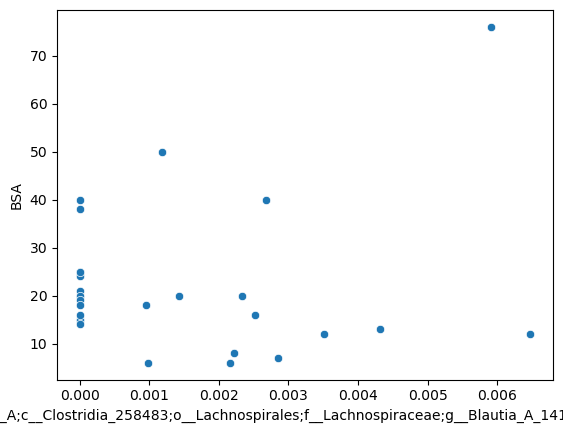

In [218]:
# metadata
df_meta = pd.read_csv(path + 'outputs/jobs51/psopsa_metadata.txt',
                      sep='\t',
                      index_col=0)

# format
df_meta.index.name = 'SampleID'
df_meta.columns = df_meta.columns.map(lambda x: x.split(':')[0])
df_meta['BSA'] = df_meta['BSA'].map(lambda x: float(x.split('%')[0]))
df_meta['BMI'] = df_meta['BMI'].astype(float)
df_meta.index = df_meta.index.map(lambda x: x.split('A.')[-1])

# import taxa
df_taxa = pd.read_csv(path + 'outputs/jobs51/taxa_table_L7.tsv', # 'outputs/jobs51/taxa_table_L6.tsv',
                      sep='\t',
                      skiprows=1,
                      index_col=0)

# format
df_taxa.index.name = 'SampleID'
df_taxa = df_taxa.T
df_taxa = df_taxa.div(df_taxa.sum(axis=1),axis=0)

# merge
df_merge = pd.concat([df_meta, df_taxa],axis=1)
df_merge = df_merge.dropna()

queries = ['Phasco','Rike','Bilophi','Alistipes','gnavus','Blautia']
intvar = []
for i in df_merge.columns.values:
    for q in queries:
        if q in i:
            intvar.append(i)

print(intvar)   

for x in intvar:
    for y in ['BMI','BSA','PASI']:
        r,p=scipy.stats.spearmanr(df_merge[x],df_merge[y])
        if p<0.2:
            if np.median(df_merge[x]) != 0:
                print(y)
                print(x)
                print(r,p)


x = 'd__Bacteria;p__Firmicutes_A;c__Clostridia_258483;o__Lachnospirales;f__Lachnospiraceae;g__Blautia_A_141781;s__Blautia_A_141781 faecis'
y = 'BSA'
sns.scatterplot(x=x,y=y,data=df_merge)

##### jobs52 #####

In [232]:
# amp aim from Adam's run
df_map = pd.read_csv(path + 'outputs/jobs52/Analysis_core_pipeline_taxonomic_0/tables/qiime_mapping_file.tsv',
                     sep='\t',
                     index_col=0)
df_map = df_map.drop('#q2:types')

# rename index
df_map.index.name = 'SampleID'

# subset cols
df_map = df_map[['Diagnosis','CRP','ESR']]
df_map['Diagnosis'] = df_map['Diagnosis'].map(lambda x: sub_dict[x] if x in sub_dict else x)

# AIMD grouping
df_map['AIMD'] = df_map['Diagnosis'].map(lambda x: 'HC' if x == 'HC' else 'AIMD')
df_map.head()

,Diagnosis,CRP,ESR,AIMD
SampleID,,,,
518-0-twin-psa-plate308,PsO,NaN,NaN,AIMD
524-0-twin-psa-plate308,PsO,NaN,NaN,AIMD
525-0-twin-psa-plate308,PsO,NaN,NaN,AIMD
528-0-twin-psa-plate308,PsO,NaN,NaN,AIMD
529-0-twin-psa-plate308,PsO,NaN,NaN,AIMD


In [233]:
df_map.Diagnosis.value_counts()

Diagnosis
RA     44
PsO    28
PsA    28
SjD    11
NSS     9
HC      6
SLE     5
Name: count, dtype: int64

In [234]:
# import taxa
df_taxa = pd.read_csv(path + 'outputs/jobs52/taxa_table_L7.tsv', # 'outputs/jobs51/taxa_table_L6.tsv',
                      sep='\t',
                      skiprows=1,
                      index_col=0)

# format
df_taxa.index.name = 'SampleID'
df_taxa = df_taxa.T
df_taxa = df_taxa.div(df_taxa.sum(axis=1),axis=0)
df_taxa.head()


SampleID,d__Archaea;p__Methanobacteriota_A_1229;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter_A;__,d__Archaea;p__Methanobacteriota_A_1229;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter_A;s__Methanobrevibacter_A smithii_A_1174,d__Archaea;p__Methanobacteriota_A_1229;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera;s__Methanosphaera stadtmanae,d__Archaea;p__Thermoplasmatota;c__Thermoplasmata_1773;o__Methanomassiliicoccales;f__Methanomethylophilaceae;g__UBA71;s__UBA71 sp002506425,d__Bacteria;__;__;__;__;__;__,d__Bacteria;p__Actinobacteriota;__;__;__;__;__,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces;__,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces;s__Actinomyces graevenitzii,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia;__,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia;s__Pauljensenia sp000308055,...,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__UBA1829;g__UBA11452;s__,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__UBA1829;g__UBA1732;s__,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__Victivallaceae;g__Victivallis;s__Victivallis lenta,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__Victivallaceae;g__Victivallis;s__Victivallis vadensis,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;__;__,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;g__Merdousia;s__Merdousia gallistercoris,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;g__Merdousia;s__Merdousia sp000438015,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;__,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;s__Akkermansia muciniphila_D_776786,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;s__Akkermansia sp001580195
131-slesjo-plate308,0.0,0.000000,0.0,0.0,0.015836,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.114119
209-pso-plate307,0.0,0.000000,0.0,0.0,0.015516,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
235-psa-plate307,0.0,0.000000,0.0,0.0,0.006313,0.0,0.0,0.0,0.000421,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.243498,0.000000
240-psa-plate307,0.0,0.000000,0.0,0.0,0.000381,0.0,0.0,0.0,0.000381,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076671,0.000000
241-pso-plate307,0.0,0.366338,0.0,0.0,0.017619,0.0,0.0,0.0,0.001025,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


SignificanceResult(statistic=-0.12504061005346917, pvalue=0.3630317593593534)


<Axes: xlabel='d__Bacteria;p__Firmicutes_A;c__Clostridia_258483;o__Lachnospirales;f__Lachnospiraceae;g__Blautia_A_141781;s__Blautia_A_141781 faecis', ylabel='CRP'>

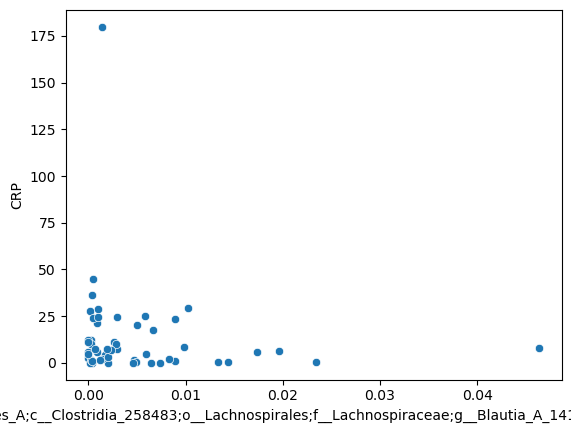

In [242]:
# merge with metadata
df_merge = pd.concat([df_taxa,df_map],axis=1)
df_merge['CRP'] = df_merge['CRP'].astype(float)
# df_merge['ESR'] = df_merge['ESR'].astype(float)

df_merge = df_merge.dropna(subset='CRP')
# df_merge = df_merge.dropna(subset='ESR')

x = 'd__Bacteria;p__Firmicutes_A;c__Clostridia_258483;o__Lachnospirales;f__Lachnospiraceae;g__Blautia_A_141781;s__Blautia_A_141781 faecis'
y='CRP'
# y='ESR'
print(scipy.stats.spearmanr(df_merge[x],df_merge[y]))
sns.scatterplot(x=x,y=y,data=df_merge)


In [249]:
# merge taxa
df_taxa = pd.read_csv(path + 'outputs/jobs52/Analysis_core_pipeline_taxonomic_0/tables/taxa_table_L6.tsv',
                      sep='\t',
                      skiprows=1,
                      index_col=0)

df_taxa.index.name = 'SampleID'
df_taxa = df_taxa.T
df_taxa = df_taxa.div(df_taxa.sum(axis=1),axis=0)

queries = ['Phasco']

for i in df_taxa.columns:
    for q in queries:
        if q in i:
            print(i)

df_taxa.head()

d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A


SampleID,d__Archaea;p__Methanobacteriota_A_1229;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter_A,d__Archaea;p__Methanobacteriota_A_1229;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,d__Archaea;p__Thermoplasmatota;c__Thermoplasmata_1773;o__Methanomassiliicoccales;f__Methanomethylophilaceae;g__UBA71,d__Bacteria;__;__;__;__;__,d__Bacteria;p__Actinobacteriota;__;__;__;__,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Varibaculum,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Bifidobacteriaceae;g__Alloscardovia,...,d__Bacteria;p__Spirochaetota;c__Spirochaetia;o__Treponematales;f__Treponemataceae;g__Treponema_D,d__Bacteria;p__Synergistota;c__Synergistia;o__Synergistales;f__Dethiosulfovibrionaceae;g__Pyramidobacter,d__Bacteria;p__Synergistota;c__Synergistia;o__Synergistales;f__Synergistaceae;g__Cloacibacillus,d__Bacteria;p__Verrucomicrobiota;c__Kiritimatiellae_777934;o__RFP12;f__UBA1067;g__Spyradenecus,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__UBA1829;g__UBA11452,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__UBA1829;g__UBA1732,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__Victivallaceae;g__Victivallis,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;__,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;g__Merdousia,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia
131-slesjo-plate308,0.000000,0.0,0.0,0.015836,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114119
209-pso-plate307,0.000000,0.0,0.0,0.015516,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
235-psa-plate307,0.000000,0.0,0.0,0.006313,0.0,0.0,0.000421,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.243498
240-psa-plate307,0.000000,0.0,0.0,0.000381,0.0,0.0,0.000381,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076671
241-pso-plate307,0.366338,0.0,0.0,0.017619,0.0,0.0,0.001025,0.0,0.000158,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


##### jobs53 #####

In [6]:
# new mapping file with updated diagnoses
df_map = pd.read_csv(path + 'inputs/Q2_MSQ138_141_noctrl_noeiser_nocd_correct_new/qiime_mapping_file_batch_nocd.tsv', sep='\t', index_col=0)
q2row = df_map.iloc[0,:]
df_map = df_map.drop('#q2:types')

# drop patient 703.019.stamp from NSS as is really MG
df_map = df_map.drop('703.019.stamp')

# 702.013.stamp is RA not NSS

# 702.014.stamp is SjD not NSS



,BarcodeSequence,LinkerPrimerSequence,AmpliconWell,BSA,BSASeverityByBSA,CCPtiter,CRP,CurrentBiologics,CurrentIntralesionalSteroids,CurrentMTX,...,CCPpos,Disease,DiseaseDurationYears,OtherSubjectID,RFpos,Batch,EverTreated,Medication,DiseaseActive,AgeAtVisit
#SampleID,,,,,,,,,,,,,,,,,,,,,
518-0-twin-psa-plate308,AGCCCTGCTACA,CCGGACTACHVGGGTWTCTAAT,A3,1.5,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,CDP,NaN,NaN,NaN,NaN
524-0-twin-psa-plate308,AGTAAAGATCGT,CCGGACTACHVGGGTWTCTAAT,E3,4,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,CDP,NaN,NaN,NaN,NaN
525-0-twin-psa-plate308,TTGCTGGACGCT,CCGGACTACHVGGGTWTCTAAT,F3,2,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,CDP,NaN,NaN,NaN,NaN
528-0-twin-psa-plate308,CCTAACGGTCCA,CCGGACTACHVGGGTWTCTAAT,A4,3.5,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,CDP,NaN,NaN,NaN,NaN
529-0-twin-psa-plate308,TTCCTTAGTAGT,CCGGACTACHVGGGTWTCTAAT,B4,0,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,CDP,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702.013.stamp.plate313,CAGCCCTACCCA,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,MSQ141,Y,HCQ,NaN,51
702.014.stamp.plate313,CTATCTCCTGTC,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,MSQ141,N,NoMed,NaN,66
602.001.ellipss.plate313,GATATACCAGTG,CCGGACTACHVGGGTWTCTAAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,MSQ141,Y,Topicals,Y,71


##### Alpha ##### 

In [5]:
# decide what to analyze
keep = ['SjD','HC','SLE','SLE-G',
        'PsA', 
        'axial spondyloarthritis','AxSpA',
        'RA','PsO']
jobs = ['jobs41', # weird SLE cohort
        'jobs44', 'jobs45',
        'jobs43',
        'jobs46','jobs47',
        'jobs48',
        'jobs49','jobs50','jobs51']

In [6]:
# alpha plots
for alpha_metric in ['shannon_entropy']:#, 'faith_pd']:
    # create list of dfs to concat
    dfs = []

    # for q2 mapping
    df = pd.read_csv(path + 'inputs/Q2_MSQ138_141_noctrl_noeiser_nocd_correct_new/' + alpha_metric + '_metadata.tsv', sep='\t')
    df = df.set_index('id')
    df = df.drop('#q2:types')

    # create cohort and do replacements
    df['cohort'] = 'AMPAIM'
    df = df.replace(sub_dict)

    # keep things only in consideratino
    df = df[df['Diagnosis'].isin(keep)]
        
    dfs.append(df)
    
    for job in jobs:
        # load df
        df = pd.read_csv(path + 'outputs/' + job + '/Analysis_core_pipeline_taxonomic_0/diversity/' + alpha_metric + '_metadata.tsv', sep='\t')
    
        # rename
        df = df.rename(columns={'host_disease':'Diagnosis'})
    
        # replace
        df = df.replace(sub_dict)
        
        # q2 modifications
        df = df.set_index('id')
        df = df.drop('#q2:types')
    
        # set cohort
        df['cohort'] = j_to_res[job]['Cohort']
    
        # append to list
        dfs.append(df)
    
    df_merge = pd.concat(dfs)
    df_merge = df_merge.dropna(how='any',axis=1)
    
    df_merge[alpha_metric] = df_merge[alpha_metric].astype(float)
    
    # filter
    df_merge = df_merge[df_merge['Diagnosis'].isin(keep)]

    # export
    df_merge.to_csv(path + 'outputs/jobs99/df_alpha_' + alpha_metric + '.tsv', sep='\t')

    # draw figure    
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_merge,x='cohort',y=alpha_metric,hue='Diagnosis',showfliers=False)
    #sns.stripplot(data=df_merge,x='cohort',y='shannon_entropy',hue='Diagnosis',legend=None,dodge=True,color='gray')
    sns.despine()
    plt.savefig(path + 'outputs/jobs99/alpha_meta_' + alpha_metric + '.pdf')
    plt.close()
#  plt.tight_layout()

df_merge.head()

,Diagnosis,shannon_entropy,cohort
id,,,
518-0-twin-psa-plate308,PsO,5.983555,AMPAIM
524-0-twin-psa-plate308,PsO,4.126833,AMPAIM
525-0-twin-psa-plate308,PsO,5.451687,AMPAIM
528-0-twin-psa-plate308,PsO,4.153750,AMPAIM
529-0-twin-psa-plate308,PsO,4.034945,AMPAIM


##### Beta #####

In [7]:
# beta plots
dfs = []
# ampaim
# df = pd.read_csv(path + 'inputs/Q2_MSQ138_141_noctrl_noeiser_nocd_correct_new/permanova-pairwise.csv')
df = pd.read_csv(path + 'inputs/Q2_MSQ138_141_noctrl_noeiser_nocd_correct/permanova-pairwise.csv')
df['cohort'] = 'AMPAIM'
df = df.replace(sub_dict)
df = df[df['Group 1'].isin(keep)]
df = df[df['Group 2'].isin(keep)]
df['comparison'] = df['Group 1'] + '_' + df['Group 2']
dfs.append(df)
# validation
for job in jobs:
    print(job)
    # load df
    df = pd.read_csv(path + 'outputs/' + job + '/Analysis_core_pipeline_taxonomic_0/diversity/permanova-pairwise.csv')
    
    # set cohort
    df['cohort'] = j_to_res[job]['Cohort']
    print(j_to_res[job]['Cohort'])

    # replace
    df = df.replace(sub_dict)
    
    # append to list
    dfs.append(df)

df_merge = pd.concat(dfs)
df_merge.index = [i for i in range(len(df_merge))]
df_merge = df_merge.dropna(how='any',axis=1)

# swap group2 HC with group1
# df_merge_final = df_merge.copy()
for i,row in df_merge.iterrows():
    print(i)
    if row.iloc[1] == 'HC':
        print('checking')
        temp = row.iloc[0]
        #print(temp)
        df_merge.iloc[i, 0] = 'HC'
        df_merge.iloc[i, 1] = temp

# df_merge['shannon_entropy'] = df_merge['shannon_entropy'].astype(float)

# filter
#keep = ['PsA','HC','SLE','SLE+G','SLE-G','RA','axial spondyloarthritis']
#df_merge = df_merge[df_merge['Diagnosis'].isin(keep)]

df_merge['-log10p'] = -1 * np.log10(df_merge['p-value'])
df_merge['Group 1'] = df_merge['Group 1'].replace(sub_dict)
df_merge['Group 2'] = df_merge['Group 2'].replace(sub_dict)


df = df_merge[df_merge['Group 1'] == 'HC']


df = df[df['Group 1'].isin(keep)]
df = df[df['Group 2'].isin(keep)]
df['Diagnosis'] = df['Group 2']

# save for R
df.to_csv(path + 'outputs/jobs99/df_beta.tsv', sep='\t')

plt.figure(figsize=(6,4))
sns.barplot(data=df,x='cohort',y='-log10p',hue='Diagnosis')#,showfliers=False)
sns.despine()
plt.savefig(path + 'outputs/jobs99/beta_permanova_pvals.pdf')
plt.close()
#sns.despine()
df.head()

jobs41
Valid1SLE
jobs44
Valid3SjD
jobs45
Valid5PsO
jobs43
Valid2AxSpA
jobs46
Valid4RA
jobs47
Valid8PsO
jobs48
Valid6SLE
jobs49
Valid7RA
jobs50
Valid10PsO
jobs51
Valid9PsD
0
checking
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
checking
30
31
32
33
34
35
36
37
38
39


,Group 1,Group 2,Sample size,Permutations,pseudo-F,p-value,q-value,cohort,-log10p,Diagnosis
0,HC,RA,49,999,1.582560,0.035,0.150,AMPAIM,1.455932,RA
5,HC,PsA,34,999,1.778235,0.020,0.140,AMPAIM,1.698970,PsA
6,HC,PsO,34,999,1.540251,0.048,0.150,AMPAIM,1.318759,PsO
7,HC,SLE,11,999,1.352017,0.117,0.189,AMPAIM,0.931814,SLE
8,HC,SjD,16,999,1.550664,0.050,0.150,AMPAIM,1.301030,SjD


##### LEfSe #####

In [32]:
# automatic parsing of pairwise lefses for queries
import itertools
# list(itertools.combinations(['A','B','C'], 2))

jobns = []
taxas = []
mwus = []
mwups = []
tts = []
ttps = []


# dict to store resluts
q_to_t = {}
queries = ['f__Rikenellaceae', 'g__Phasco','g__Prevotella']
# queries = ['f__Tannerell','g__Parabacter']
# queries = [x.replace('.','|') for x in LDAnan]
#queries = [x.replace('__','protect') for x in queries]
#queries = [x.replace('_','-') for x in queries]
#queries = [x.replace('protect','__') for x in queries]



# do MWU on each col and the aggregate
for q in queries:
    print('query: ' + q)

    # compile dfs 
    dfs = []
    for job in jobs:
        print(job)
        if 'jobs4' in job:
            df = pd.read_csv(path + 'outputs/' + job + '/Analysis_lefse_0/tables/Diagnosis/lefse_format.taxa_table_L7.Diagnosis.NA.tsv', 
                             sep='\t', 
                             header=None)
        else:
            # for AMPAIM jobs
            df = pd.read_csv(path + 'outputs/' + job + '/lefse_table.tsv', 
                             sep='\t',
                             header=None)
        df = df.T
        df.columns = df.iloc[0,:]
        df = df.drop(0) # drops the row of col names
        df = df.iloc[:,1:] # drops one of the Diagnosis cols
                
        # rename dx
        # df = df.rename(columns=dx_sub_dict)
                
        df['SampleID'] = job + '_' + df['HostSubjectId'] + '_' + df['Diagnosis'].replace(sub_dict)
        df = df.drop(['Diagnosis','HostSubjectId'], axis=1)
        df = df.set_index('SampleID')

        
        # normalize columns
        df = df.astype(float)
        df = df.div(df.sum(axis=1),axis=0)
        
        # put back diagnosis col
        df['Diagnosis'] = df.index.map(lambda x: x.split('_')[-1])

        # if AMPAIM job not jobs09, drop the healthy samples
        if job in ['jobs10','jobs11','jobs12','jobs13','jobs14']:
            df = df[df['Diagnosis'] != 'HC']
        
        # find relevant taxa to the query
        int_taxa = []
        for f in df.columns.values:
            if q in f:
                # print(f)
                int_taxa.append(f)
        print(len(int_taxa))
            
        # subset on taxa of interest
        df_sub = df[int_taxa] 
        
        # create new total 'collapsed genus'
        df_sub['total_' + q] = df_sub.sum(axis=1)
        
        # bring back Diagnosis column
        df_sub['Diagnosis'] = df['Diagnosis']
        
        # make cohort col
        df_sub['Cohort'] = j_to_res[job]['Cohort']

        #
        print(df_sub.Diagnosis.value_counts())
        # add to list of dfs
        dfs.append(df_sub)

    # create big df
    df_sub = pd.concat(dfs)

    # for the taxa
    for t in df_sub.columns:
        if '__' in t:
            diagnoses = df_sub['Diagnosis'].unique()
            
            # do all pairwise combos
            # for pair in list(itertools.combinations(diagnoses, 2)):
            #     d0, d1 = pair
            #     #print(t)
            #     #print(d0,d1)
            #     df_d0 = df_sub[df_sub['Diagnosis'] == d0]
            #     df_d1 = df_sub[df_sub['Diagnosis'] == d1]
            #     u,p1 = scipy.stats.mannwhitneyu(df_d0[t],df_d1[t])
            #     #print('MWU: u=' + str(np.round(u,2)) + ', p=' + str(np.round(p1,3)))
            #     r,p2 = scipy.stats.ttest_ind(df_d0[t],df_d1[t])
            #     #print('TT: t=' + str(np.round(r,2)) + ', p=' + str(np.round(p2,3)))
            #     #print('\n')
            #     jobns.append(job)
            #     taxas.append(t)
            #     mwus.append(u)
            #     mwups.append(p1)
            #     tts.append(r)
            #     ttps.append(p2)
        
            #     plt.figure(figsize=(4,3))
            #     sns.boxplot(data=df_sub, x='Diagnosis', y=t, showfliers=False)
            #     sns.stripplot(data=df_sub, x='Diagnosis', y=t,legend=None)
            #     plt.tight_layout()
            #     sns.despine()
            #     plt.savefig(path + 'outputs/jobs100/plots/' + d0 + '_' + d1 + '_' + t + '.pdf')
            #     plt.close()
        
            # boxplot across all studies
            plt.figure(figsize=(8,6))
            sns.boxplot(data=df_sub, x='Cohort',hue='Diagnosis', y=t, showfliers=False)
            # sns.stripplot(data=df_sub, x='Cohort', hue='Diagnosis', y=t,legend=None)
            plt.tight_layout()
            sns.despine()
            plt.savefig(path + 'outputs/jobs100/plots/all_' + t.split('f__')[-1] + '.pdf')
            plt.close()


df_ref = pd.DataFrame({'job': jobns, 'taxa': taxas, 'MWU': mwus, 'MWU_p': mwups, 'ttest': tts, 'ttest_p': ttps})
df_ref

query: f__Rikenellaceae
jobs41
11
Diagnosis
SLE+G    20
HC       20
SLE      17
Name: count, dtype: int64
jobs44
13
Diagnosis
SjD    63
HC     24
Name: count, dtype: int64
jobs45
11
Diagnosis
PsO    39
HC     21
Name: count, dtype: int64
jobs46
7
Diagnosis
RA    26
HC    26
Name: count, dtype: int64
jobs49
8
Diagnosis
PsO    26
HC      9
Name: count, dtype: int64
query: g__Phasco
jobs41
4
Diagnosis
SLE+G    20
HC       20
SLE      17
Name: count, dtype: int64
jobs44
6
Diagnosis
SjD    63
HC     24
Name: count, dtype: int64
jobs45
5
Diagnosis
PsO    39
HC     21
Name: count, dtype: int64
jobs46
4
Diagnosis
RA    26
HC    26
Name: count, dtype: int64
jobs49
1
Diagnosis
PsO    26
HC      9
Name: count, dtype: int64
query: g__Prevotella
jobs41
15
Diagnosis
SLE+G    20
HC       20
SLE      17
Name: count, dtype: int64
jobs44
55
Diagnosis
SjD    63
HC     24
Name: count, dtype: int64
jobs45
14
Diagnosis
PsO    39
HC     21
Name: count, dtype: int64
jobs46
14
Diagnosis
RA    26
HC    26
Name:

,job,taxa,MWU,MWU_p,ttest,ttest_p


##### Scratch #####

##### AMP AIM pc2 metacyc pathway analysis #####

In [296]:
# taxa
df_taxa = pd.read_csv(path + 'outputs/jobs52/Analysis_core_pipeline_taxonomic_0/tables/taxa_table_L6.tsv',
                      sep='\t',
                      skiprows=1,
                      index_col=0)

df_taxa.index.name = 'SampleID'
df_taxa = df_taxa.T
df_taxa = df_taxa.div(df_taxa.sum(axis=1),axis=0)

queries = ['Phasco']

for i in df_taxa.columns:
    for q in queries:
        if q in i:
            print(i)

df_taxa.head()

d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A


SampleID,d__Archaea;p__Methanobacteriota_A_1229;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter_A,d__Archaea;p__Methanobacteriota_A_1229;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,d__Archaea;p__Thermoplasmatota;c__Thermoplasmata_1773;o__Methanomassiliicoccales;f__Methanomethylophilaceae;g__UBA71,d__Bacteria;__;__;__;__;__,d__Bacteria;p__Actinobacteriota;__;__;__;__,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Actinomyces,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Pauljensenia,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Peptidiphaga,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Varibaculum,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Bifidobacteriaceae;g__Alloscardovia,...,d__Bacteria;p__Spirochaetota;c__Spirochaetia;o__Treponematales;f__Treponemataceae;g__Treponema_D,d__Bacteria;p__Synergistota;c__Synergistia;o__Synergistales;f__Dethiosulfovibrionaceae;g__Pyramidobacter,d__Bacteria;p__Synergistota;c__Synergistia;o__Synergistales;f__Synergistaceae;g__Cloacibacillus,d__Bacteria;p__Verrucomicrobiota;c__Kiritimatiellae_777934;o__RFP12;f__UBA1067;g__Spyradenecus,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__UBA1829;g__UBA11452,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__UBA1829;g__UBA1732,d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__Victivallaceae;g__Victivallis,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;__,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;g__Merdousia,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia
131-slesjo-plate308,0.000000,0.0,0.0,0.015836,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114119
209-pso-plate307,0.000000,0.0,0.0,0.015516,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
235-psa-plate307,0.000000,0.0,0.0,0.006313,0.0,0.0,0.000421,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.243498
240-psa-plate307,0.000000,0.0,0.0,0.000381,0.0,0.0,0.000381,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076671
241-pso-plate307,0.366338,0.0,0.0,0.017619,0.0,0.0,0.001025,0.0,0.000158,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [297]:
# pc2
df_pc = pd.read_csv("/Users/KevinBu/Desktop/clemente_lab/Projects/ampaim/outputs/jobs52/Analysis_picrust2_0/picrust2_out/pathways_out/path_abun_unstrat.tsv", 
                    sep='\t',
                    index_col=0)

df_pc.head()

,131-slesjo-plate308,209-pso-plate307,235-psa-plate307,240-psa-plate307,241-pso-plate307,260-pso-plate307,272-psa-plate307,2771-slesjo-plate308,2876-slesjo-plate308,288-psa-plate307,...,702.014.stamp.plate313,703.001.stamp.plate313,703.005.stamp.plate313,703.006.stamp.plate313,703.008.stamp.plate313,703.009.stamp.plate313,703.010.stamp.plate313,703.011.stamp.plate313,703.013.stamp.plate313,703.016.stamp.plate313
pathway,,,,,,,,,,,,,,,,,,,,,
1CMET2-PWY,20279.191777,18962.032863,8034.671848,6306.372910,15319.256756,12079.247120,22862.111755,12205.980760,15319.723807,28632.912363,...,37189.543715,60629.178632,8659.202730,50534.811894,38260.505893,46010.273537,28127.259921,43577.652628,49744.721432,45481.354305
3-HYDROXYPHENYLACETATE-DEGRADATION-PWY,6.975591,0.000000,0.000000,8.300238,13.982792,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.622070,0.000000,1960.514078,0.000000,0.000000,0.000000,0.000000,0.000000
ALL-CHORISMATE-PWY,1488.666269,992.806172,0.000000,57.470666,883.612699,133.725183,325.496431,0.000000,191.682544,118.730530,...,4245.286129,0.000000,1925.789818,0.000000,7689.967834,687.961182,0.000000,9059.561874,386.657092,104.327107
ANAEROFRUCAT-PWY,25482.494037,22542.463500,7078.678382,6282.303627,19285.783758,12969.830974,21596.935077,12617.609112,15462.914172,18087.838922,...,16636.914462,53955.381009,8155.455093,53511.669025,43717.004530,48547.199153,24280.239478,46173.739615,43798.663770,49021.126596
ANAGLYCOLYSIS-PWY,28130.958941,25910.148268,11393.844693,7944.126514,22517.842003,13938.277904,31663.028092,15750.961964,18907.328462,39188.966671,...,48585.692239,83796.359514,12026.835131,69045.825082,51649.830110,61194.884936,33870.212253,58739.525317,68108.204836,63110.383513


In [298]:
# grab mapping
df_mc = pd.read_csv(path + 'inputs/metacyc_pathways_info.txt', sep='\t', header=None)
df_mc.columns = ['pathway','metacyc']
df_mc = df_mc.set_index('pathway')

# merge with df_pc
df_mc = pd.concat([df_mc, df_pc], axis=1)
df_mc = df_mc.set_index('metacyc')

# remove pathways not present in taxa
df_mc = df_mc.dropna(axis=0)

# normalize and transpose
df_mc = df_mc.T
df_mc = df_mc.div(df_mc.sum(axis=1),axis=0)

# median and std of mean abund 
meanabunds = []
for i in df_mc.columns:
    meanabunds.append(np.nanmean(df_mc[i]))

print(np.median(meanabunds),np.mean(meanabunds), np.std(meanabunds,ddof=1))
df_mc.head()

0.0012068260011333235 0.002617801047120419 0.0030216046023464975


metacyc,N10-formyl-tetrahydrofolate biosynthesis,4-hydroxyphenylacetate degradation,superpathway of chorismate metabolism,homolactic fermentation,glycolysis III (from glucose),"superpathway of L-arginine, putrescine, and 4-aminobutanoate degradation","arginine, ornithine and proline interconversion",superpathway of arginine and polyamine biosynthesis,L-arginine biosynthesis II (acetyl cycle),L-arginine biosynthesis I (via L-ornithine),...,superpathway of thiamin diphosphate biosynthesis I,superpathway of L-threonine metabolism,superpathway of L-threonine biosynthesis,tRNA charging,L-tryptophan biosynthesis,L-tyrosine degradation I,superpathway of ubiquinol-8 biosynthesis (prokaryotic),UDP-N-acetyl-D-glucosamine biosynthesis I,L-valine degradation I,L-valine biosynthesis
131-slesjo-plate308,0.006503,0.000002,0.000477,0.008171,0.009021,0.000148,0.000575,0.001982,0.006773,0.006612,...,0.003028,0.000078,0.007363,0.007759,0.005301,0.000000,0.000201,0.006328,0.0,0.008562
209-pso-plate307,0.006352,0.000000,0.000333,0.007551,0.008680,0.000098,0.000239,0.002254,0.005957,0.005933,...,0.005254,0.000000,0.007848,0.007140,0.005482,0.000016,0.000227,0.004087,0.0,0.008231
235-psa-plate307,0.007063,0.000000,0.000000,0.006223,0.010017,0.000000,0.000462,0.001308,0.008127,0.007745,...,0.003434,0.000000,0.007637,0.007595,0.007730,0.000004,0.000005,0.003069,0.0,0.008976
240-psa-plate307,0.007016,0.000009,0.000064,0.006989,0.008837,0.000015,0.000552,0.001069,0.006539,0.006359,...,0.003926,0.000028,0.007785,0.007393,0.006748,0.000000,0.000019,0.003179,0.0,0.008729
241-pso-plate307,0.005847,0.000005,0.000337,0.007360,0.008594,0.000169,0.000261,0.000967,0.009771,0.009451,...,0.004408,0.000021,0.008446,0.009293,0.005945,0.000088,0.000178,0.009295,0.0,0.011398


In [299]:
# grab SCFA pathways
queries = [
    'buta', 'fatty acid'
]
tosum = []
for i in df_mc.columns:
    for q in queries:
        if q in i:
            print(i)
            #print(np.nanmean(df_mc[i]))
            tosum.append(i)

tosum=[
    # 'superpathway of L-arginine, putrescine, and 4-aminobutanoate degradation'
    'pyruvate fermentation to butanoate',
    'fatty acid &beta;-oxidation I',
    #'fatty acid elongation -- saturated',
    # 'superpathway of fatty acid biosynthesis initiation (E. coli)
    #'superpathway of (R,R)-butanediol biosynthesis',
    'L-lysine fermentation to acetate and butanoate',
    '4-aminobutanoate degradation V',
    'acetyl-CoA fermentation to butanoate II',
    'succinate fermentation to butanoate',
    #'superpathway of 2,3-butanediol biosynthesis',
    'glycerol degradation to butanol'
    #'fatty acid salvage'
    #'pyruvate fermentation to isobutanol (engineered)
]

df_mc['tosum'] = df_mc[tosum].sum(axis=1)
df_mc.tosum
# also probably want to look at the sum of all pathways

superpathway of L-arginine, putrescine, and 4-aminobutanoate degradation
pyruvate fermentation to butanoate
fatty acid &beta;-oxidation I
fatty acid elongation -- saturated
superpathway of fatty acid biosynthesis initiation (E. coli)
superpathway of (R,R)-butanediol biosynthesis
L-lysine fermentation to acetate and butanoate
4-aminobutanoate degradation V
acetyl-CoA fermentation to butanoate II
succinate fermentation to butanoate
superpathway of 2,3-butanediol biosynthesis
glycerol degradation to butanol
fatty acid salvage
pyruvate fermentation to isobutanol (engineered)


131-slesjo-plate308       0.006647
209-pso-plate307          0.002905
235-psa-plate307          0.002383
240-psa-plate307          0.002358
241-pso-plate307          0.003301
                            ...   
703.009.stamp.plate313    0.002699
703.010.stamp.plate313    0.004923
703.011.stamp.plate313    0.007105
703.013.stamp.plate313    0.005869
703.016.stamp.plate313    0.003942
Name: tosum, Length: 131, dtype: float64

SignificanceResult(statistic=-0.03409593561393659, pvalue=0.81415829303095)


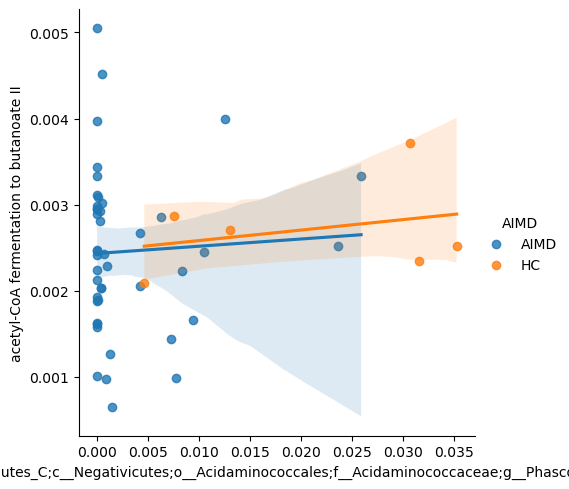

In [302]:
# plot
# amp aim from Adam's run
df_map = pd.read_csv(path + 'outputs/jobs52/Analysis_core_pipeline_taxonomic_0/tables/qiime_mapping_file.tsv',
                     sep='\t',
                     index_col=0)
df_map = df_map.drop('#q2:types')

# rename index
df_map.index.name = 'SampleID'

# subset cols
df_map = df_map[['Diagnosis','CRP','ESR']]
df_map['Diagnosis'] = df_map['Diagnosis'].map(lambda x: sub_dict[x] if x in sub_dict else x)

# AIMD grouping
df_map['AIMD'] = df_map['Diagnosis'].map(lambda x: 'HC' if x == 'HC' else 'AIMD')
df_map.head()

df_merge = pd.concat([df_taxa, df_map, df_mc],axis=1)
df_merge = df_merge[df_merge['Diagnosis'].isin(['RA','HC'])]

y='acetyl-CoA fermentation to butanoate II'
# y='tosum'
x='d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A'

print(scipy.stats.spearmanr(df_merge[x],df_merge[y]))
sns.lmplot(x=x,y=y,data=df_merge,hue='AIMD')
sns.despine()

KruskalResult(statistic=67.64302030116086, pvalue=0.9999774452029498)
F_onewayResult(statistic=0.4004671919144345, pvalue=0.9999999993868739)


<Axes: xlabel='Diagnosis', ylabel='tosum'>

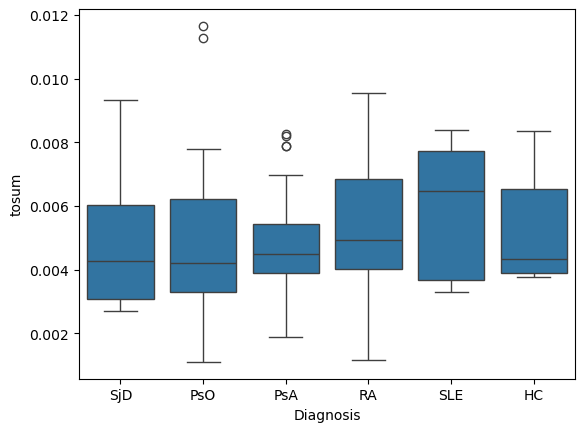

In [120]:
# plot
df_merge = pd.concat([df_taxa, df_map, df_mc],axis=1)
df_merge = df_merge[df_merge['Diagnosis'] != 'NSS']

#y='acetyl-CoA fermentation to butanoate II'
y='tosum'
x='d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A'

print(scipy.stats.kruskal(*[df_merge[df_merge['Diagnosis'] == d][y] for d in df_merge.Diagnosis]))
print(scipy.stats.f_oneway(*[df_merge[df_merge['Diagnosis'] == d][y] for d in df_merge.Diagnosis]))

sns.boxplot(x='Diagnosis',y=y,data=df_merge)
#sns.lmplot(x=x,y=y,data=df_merge,hue='AIMD')
#sns.despine()

##### AMP AIM pc2 briteKO pathway analysis #####

In [246]:
# df brite
df_br = pd.read_csv(path + 'outputs/jobs52/Analysis_picrust2_0/picrust2_out/KO_metagenome_out/pred_metagenome_unstrat_KB_briteko.tsv',
                    sep='\t',
                    index_col=0)
# normalize and transpose
df_br = df_br.T
df_br = df_br.div(df_br.sum(axis=1),axis=0)

# median and std of mean abund 
meanabunds = []
for i in df_br.columns:
    meanabunds.append(np.nanmean(df_br[i]))

print(np.median(meanabunds),np.mean(meanabunds), np.std(meanabunds,ddof=1))
df_mc.head()

0.00012110388321194696 0.002506265664160401 0.011438118958434908


metacyc,N10-formyl-tetrahydrofolate biosynthesis,4-hydroxyphenylacetate degradation,superpathway of chorismate metabolism,homolactic fermentation,glycolysis III (from glucose),"superpathway of L-arginine, putrescine, and 4-aminobutanoate degradation","arginine, ornithine and proline interconversion",superpathway of arginine and polyamine biosynthesis,L-arginine biosynthesis II (acetyl cycle),L-arginine biosynthesis I (via L-ornithine),...,superpathway of thiamin diphosphate biosynthesis I,superpathway of L-threonine metabolism,superpathway of L-threonine biosynthesis,tRNA charging,L-tryptophan biosynthesis,L-tyrosine degradation I,superpathway of ubiquinol-8 biosynthesis (prokaryotic),UDP-N-acetyl-D-glucosamine biosynthesis I,L-valine degradation I,L-valine biosynthesis
131-slesjo-plate308,0.006503,0.000002,0.000477,0.008171,0.009021,0.000148,0.000575,0.001982,0.006773,0.006612,...,0.003028,0.000078,0.007363,0.007759,0.005301,0.000000,0.000201,0.006328,0.0,0.008562
209-pso-plate307,0.006352,0.000000,0.000333,0.007551,0.008680,0.000098,0.000239,0.002254,0.005957,0.005933,...,0.005254,0.000000,0.007848,0.007140,0.005482,0.000016,0.000227,0.004087,0.0,0.008231
235-psa-plate307,0.007063,0.000000,0.000000,0.006223,0.010017,0.000000,0.000462,0.001308,0.008127,0.007745,...,0.003434,0.000000,0.007637,0.007595,0.007730,0.000004,0.000005,0.003069,0.0,0.008976
240-psa-plate307,0.007016,0.000009,0.000064,0.006989,0.008837,0.000015,0.000552,0.001069,0.006539,0.006359,...,0.003926,0.000028,0.007785,0.007393,0.006748,0.000000,0.000019,0.003179,0.0,0.008729
241-pso-plate307,0.005847,0.000005,0.000337,0.007360,0.008594,0.000169,0.000261,0.000967,0.009771,0.009451,...,0.004408,0.000021,0.008446,0.009293,0.005945,0.000088,0.000178,0.009295,0.0,0.011398


In [247]:
# grab SCFA pathways
queries = [
    'Buta', 'Propano','Lysine degradation'
]
tosum = []
for i in df_br.columns:
    for q in queries:
        if q in i:
            print(i)
            #print(np.nanmean(df_mc[i]))
            tosum.append(i)

#tosum=[
#]

df_br['tosum'] = df_br[tosum].sum(axis=1)
df_br.tosum
# also probably want to look at the sum of all pathways

Metabolism|Carbohydrate metabolism|Butanoate metabolism
Metabolism|Carbohydrate metabolism|Propanoate metabolism
Metabolism|Amino acid metabolism|Lysine degradation


131-slesjo-plate308       0.004148
209-pso-plate307          0.004567
235-psa-plate307          0.004614
240-psa-plate307          0.004453
241-pso-plate307          0.003641
                            ...   
703.009.stamp.plate313    0.004564
703.010.stamp.plate313    0.004804
703.011.stamp.plate313    0.004787
703.013.stamp.plate313    0.004136
703.016.stamp.plate313    0.004274
Name: tosum, Length: 131, dtype: float64

SignificanceResult(statistic=0.24065781653529225, pvalue=0.016985659203176334)
SignificanceResult(statistic=-0.5428571428571429, pvalue=0.26570262390670557)


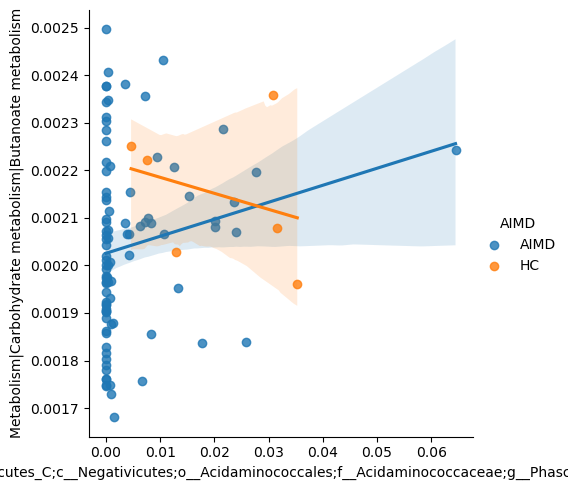

In [250]:
# plot
df_merge = pd.concat([df_taxa, df_map, df_br],axis=1)
df_merge = df_merge[df_merge['Diagnosis'].isin(['RA','HC', 'PsA', 'NSS','SjD'])]

#y='Metabolism|Carbohydrate metabolism|Propanoate metabolism'
y='Metabolism|Carbohydrate metabolism|Butanoate metabolism'
#y='Metabolism|Amino acid metabolism|Lysine degradation'
#y='tosum'
x='d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A'
print(scipy.stats.spearmanr(df_merge[x],df_merge[y]))
print(scipy.stats.spearmanr(df_merge[df_merge['Diagnosis']=='HC'][x],df_merge[df_merge['Diagnosis']=='HC'][y]))
sns.lmplot(x=x,y=y,data=df_merge,hue='AIMD')
sns.despine()

KruskalResult(statistic=70.9944458650577, pvalue=0.9781581240886654)
F_onewayResult(statistic=0.6845962240156207, pvalue=0.9918651091365589)
TtestResult(statistic=-1.5203043369356009, pvalue=0.13499497664294463, df=48.0)
TtestResult(statistic=-1.7383953301383461, pvalue=0.09175615356462012, df=32.0)
TtestResult(statistic=-0.6507813670861304, pvalue=0.5250318365475151, df=15.0)


<Axes: xlabel='Diagnosis', ylabel='Metabolism|Carbohydrate metabolism|Butanoate metabolism'>

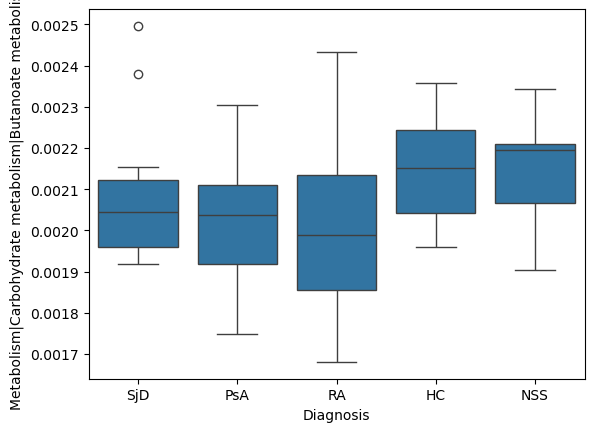

In [255]:
# plot
df_merge = pd.concat([df_taxa, df_map, df_br],axis=1)
df_merge = df_merge[df_merge['Diagnosis'].isin(['RA','HC', 'PsA', 'NSS','SjD'])]

y='tosum'
y='Metabolism|Carbohydrate metabolism|Butanoate metabolism'
# x='d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A'

print(scipy.stats.kruskal(*[df_merge[df_merge['Diagnosis'] == d][y] for d in df_merge.Diagnosis]))
print(scipy.stats.f_oneway(*[df_merge[df_merge['Diagnosis'] == d][y] for d in df_merge.Diagnosis]))
print(scipy.stats.ttest_ind(df_merge[df_merge['Diagnosis'] == 'RA'][y], df_merge[df_merge['Diagnosis'] == 'HC'][y]))
print(scipy.stats.ttest_ind(df_merge[df_merge['Diagnosis'] == 'PsA'][y], df_merge[df_merge['Diagnosis'] == 'HC'][y]))
print(scipy.stats.ttest_ind(df_merge[df_merge['Diagnosis'] == 'SjD'][y], df_merge[df_merge['Diagnosis'] == 'HC'][y]))

sns.boxplot(x='Diagnosis',y=y,data=df_merge)
#sns.lmplot(x=x,y=y,data=df_merge,hue='AIMD')
#sns.despine()

##### jobsn #####

In [538]:
# j_to_res has dict of info
# j_to_res[jobn] has 'Cohort','Diagnosis'
jobs = ['jobs43','jobs46','jobs44','jobs45','jobs47']
jobs = ['jobs51']
jobs = ['jobs48','jobs50','jobs49']
jobs = ['jobs52']
jobs = ['jobs48']

for jobn in jobs:
    # jobn='jobs43' # jobs46

    ###
    # get mapping file
    ###
    df_map = pd.read_csv(path + 'outputs/' + jobn + '/qiime_mapping_file.tsv',
                         sep='\t',
                         index_col=0)
    df_map = df_map.drop('#q2:types')
    
    # rename index
    df_map.index.name = 'SampleID'
    
    # subset cols
    #if jobn == 'jobs43':
    #    df_map = df_map.rename(columns={'host_disease': 'Diagnosis'})
    
    df_map['Diagnosis'] = df_map['Diagnosis'].map(lambda x: sub_dict[x] if x in sub_dict else x)
    
    ###
    # get taxa file    
    ###
    if jobn in ['jobs43', 'jobs46']:
        skiprow=1
    else:
        skiprow=0
        
    df_taxa = pd.read_csv(path + 'outputs/' + jobn + '/Analysis_core_pipeline_taxonomic_0/tables/taxa_table_L6.tsv',
                          sep='\t',
                          skiprows=skiprow,
                          index_col=0)
    
    df_taxa.index.name = 'SampleID'
    df_taxa = df_taxa.T
    df_taxa = df_taxa.div(df_taxa.sum(axis=1),axis=0)

    # find relevant taxa
    queries = ['Phasco','Rikenellaceae']
    tosum = []
    for i in df_taxa.columns:
        for q in queries:
            if q in i:
                print(i)
                tosum.append(i)
    df_taxa['taxa_tosum'] = df_taxa[tosum].sum(axis=1)

    ###
    # grab adiv
    ###
    df_alpha = pd.read_csv(path + 'outputs/' + jobn + '/Analysis_core_pipeline_taxonomic_0/diversity/shannon_entropy_metadata.tsv', 
                           sep='\t',
                           index_col=0)

    df_alpha = df_alpha.drop('#q2:types')
    df_alpha.index.name = 'SampleID'
    
    ###
    # get pathway file
    ###
    df_br = pd.read_csv(path + 'outputs/' + jobn + '/Analysis_picrust2_0/picrust2_out/KO_metagenome_out/pred_metagenome_unstrat_KB_briteko.tsv',
                         sep= '\t',
                         index_col=0)
    
    # normalize and transpose
    df_br = df_br.T
    df_br = df_br.div(df_br.sum(axis=1),axis=0)
    
    # grab SCFA pathways
    queries = ['Buta', 'Propano','Lysine degradation']
    tosum = []
    for i in df_br.columns:
        for q in queries:
            if q in i:
                print(i)
                #print(np.nanmean(df_mc[i]))
                tosum.append(i)
    
    df_br['path_tosum'] = df_br[tosum].sum(axis=1)

    # merge df
    df_merge = pd.concat([df_taxa, df_map, df_br, df_alpha],axis=1)
    j_to_res[jobn]['df_merge'] = df_merge.copy()
    df_merge.to_csv(path + 'outputs/' + jobn + '/df_merge.tsv',sep='\t')
    
df_merge.head()

d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871400
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes_A_871404
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Gallalistipes
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Tidjanibacter
d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A
Metabolism|Carbohydrate metabolism|Butanoate metabolism
Metabolism|Carbohydrate metabolism|Propanoate metabolism
Metabolism|Amino acid metabolism|Lysine degradation


,Unassigned;__;__;__;__;__,d__Archaea;p__Methanobacteriota_A_1229;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter_A,d__Archaea;p__Methanobacteriota_A_1229;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,d__Archaea;p__Thermoproteota;c__Nitrososphaeria_A;o__Nitrososphaerales;f__Nitrosopumilaceae;__,d__Archaea;p__Thermoproteota;c__Nitrososphaeria_A;o__Nitrososphaerales;f__Nitrosopumilaceae;g__TA-20,d__Bacteria;__;__;__;__;__,d__Bacteria;p__;c__;o__;f__;g__,d__Bacteria;p__Acidobacteriota;c__Acidobacteriae;__;__;__,d__Bacteria;p__Acidobacteriota;c__Acidobacteriae;o__Acidobacteriales;__;__,d__Bacteria;p__Acidobacteriota;c__Acidobacteriae;o__Acidobacteriales;f__Acidobacteriaceae;__,...,Metabolism|Metabolism of terpenoids and polyketides|Type I polyketide structures,Metabolism|Xenobiotics biodegradation and metabolism|Furfural degradation,"Metabolism|Lipid metabolism|Cutin, suberine and wax biosynthesis",Metabolism|Biosynthesis of other secondary metabolites|Biosynthesis of various alkaloids,path_tosum,AGE,AvgSpotLen,sex,Diagnosis,shannon_entropy
SRR12315795,0.0,0.0,0.0,0.0,0.0,0.001701,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.0,0.003826,43,252,female,SLE,2.24042053996358
SRR12315796,0.0,0.0,0.0,0.0,0.0,0.004125,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.0,0.002853,38,252,female,SLE,0.566653099103615
SRR12315797,0.0,0.0,0.0,0.0,0.0,0.004257,0.0,0.0,0.0,0.0,...,0.0,4.966255e-07,0.0,0.0,0.004305,12,252,female,SLE,6.07027845739149
SRR12315798,0.0,0.0,0.0,0.0,0.0,0.004729,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.0,0.004202,40,252,female,SLE,5.49438635814086
SRR12315799,0.0,0.0,0.0,0.0,0.0,0.007597,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.0,0.0,0.003890,33,252,female,SLE,5.34819754585338


In [444]:
# aggregate analyses of hypotheses of interest
test_stats = [] 
pvals = []
cohorts = []
analyses_str = []

name_to_analyses = {
    'PhasL6_Butanoate_spearman': {
        'x': 'd__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A',
        'y': 'Metabolism|Carbohydrate metabolism|Butanoate metabolism'
    },
    'PhasL6_Propanoate_spearman': {
        'x': 'd__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A',
        'y': 'Metabolism|Carbohydrate metabolism|Propanoate metabolism'
    },
    'PhasL6_Lysine_spearman': {
        'x': 'd__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A',
        'y': 'Metabolism|Amino acid metabolism|Lysine degradation'
    },
    'PhasL6_pathtosum_spearman': {
        'x': 'd__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A',
        'y': 'path_tosum'
    },   
    
    'taxatosum_Butanoate_spearman': {
        'x': 'taxa_tosum',
        'y': 'Metabolism|Carbohydrate metabolism|Butanoate metabolism'
    },
    'taxatosum_Propanoate_spearman': {
        'x': 'taxa_tosum',
        'y': 'Metabolism|Carbohydrate metabolism|Propanoate metabolism'
    },
    'taxatosum_Lysine_spearman': {
        'x': 'taxa_tosum',
        'y': 'Metabolism|Amino acid metabolism|Lysine degradation'
    },
    'taxatosum_pathtosum_spearman': {
        'x': 'taxa_tosum',
        'y': 'path_tosum'
    }

    
}

for jobn in jobs:
    print(jobn)
    for jobdesc in name_to_analyses:
        x = name_to_analyses[jobdesc]['x']
        y = name_to_analyses[jobdesc]['y']

        # subset on samples of interest
        dx = j_to_res[jobn]['Diagnosis']
        cohort = j_to_res[jobn]['Cohort']
        df_merge = j_to_res[jobn]['df_merge'].copy()
    
        # subest dataframe on relevant samples
        df_sub = df_merge[df_merge['Diagnosis'].isin(['HC',dx])]
        df_sub = df_sub.dropna(subset=['Diagnosis','taxa_tosum'])
    
        if jobn == 'jobs43':
            df_sub = df_sub[df_sub['misc_param_biologic_use'] == 'naive']
        
        # compute corr
        r,p = scipy.stats.spearmanr(df_sub[x],df_sub[y])
        if p < 0.2:
            print(jobdesc)
            print(r,p)
        
        # save results
        analyses_str.append(jobdesc)
        cohorts.append(cohort)
        pvals.append(p)
        test_stats.append(r)
    
        plt.figure(figsize=(4,3))
        sns.lmplot(x=x,y=y,data=df_merge,hue='Diagnosis')
        sns.despine()
        plt.title('r=' + str(np.round(r,3)) + '_p=' + str(np.round(p,3)))
        plt.tight_layout()
        plt.savefig(path + 'outputs/jobs98/' + jobdesc + '_' + cohort + '.pdf')
        plt.close()


jobs48
PhasL6_Propanoate_spearman
-0.21935707678075855 0.1384862019508397
taxatosum_Propanoate_spearman
-0.2846901017576318 0.05243739764142394
taxatosum_pathtosum_spearman
-0.19183626271970397 0.19643152070399295
jobs50
PhasL6_Butanoate_spearman
0.29596079526165014 0.06734486996726763
PhasL6_Lysine_spearman
0.2782692244969998 0.0862875649301093
PhasL6_pathtosum_spearman
0.41767027606424445 0.008153855237469735
taxatosum_Butanoate_spearman
0.6449851334754539 9.320318597652486e-06
taxatosum_Propanoate_spearman
-0.23870326334718345 0.143343966854312
taxatosum_Lysine_spearman
0.7617025186095606 1.785873060981196e-08
taxatosum_pathtosum_spearman
0.7045596321376544 5.556874904622253e-07
jobs49


<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

In [ ]:
### build a stratified KO table





In [ ]:
# plot
df_merge = pd.concat([df_taxa, df_map, df_br],axis=1)
# df_merge = df_merge[df_merge['Diagnosis'].isin(['RA','HC', 'PsA', 'NSS','SjD'])]

y='tosum'
y='Metabolism|Carbohydrate metabolism|Butanoate metabolism'
y='d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A'

kw_pv = []
kw_ts = []
anova_pv = []
anova_ts = []
ttest_pv = []
ttest_ts = []
mwu_pv = []
mwu_ts = []

phas_

print(scipy.stats.kruskal(*[df_merge[df_merge['Diagnosis'] == d][y] for d in df_merge.Diagnosis]))
print(scipy.stats.f_oneway(*[df_merge[df_merge['Diagnosis'] == d][y] for d in df_merge.Diagnosis]))
print(scipy.stats.ttest_ind(df_merge[df_merge['Diagnosis'] == 'AxSpA'][y], df_merge[df_merge['Diagnosis'] == 'HC'][y]))
print(scipy.stats.mannwhitneyu(df_merge[df_merge['Diagnosis'] == 'AxSpA'][y], df_merge[df_merge['Diagnosis'] == 'HC'][y]))
#print(scipy.stats.ttest_ind(df_merge[df_merge['Diagnosis'] == 'PsA'][y], df_merge[df_merge['Diagnosis'] == 'HC'][y]))
#print(scipy.stats.ttest_ind(df_merge[df_merge['Diagnosis'] == 'SjD'][y], df_merge[df_merge['Diagnosis'] == 'HC'][y]))

sns.boxplot(x='Diagnosis',y=y,data=df_merge)
#sns.lmplot(x=x,y=y,data=df_merge,hue='AIMD')
#sns.despine()

##### DEBIAS M #####

In [ ]:
## import packages
import numpy as np
from sklearn.metrics import roc_auc_score
from debiasm import DebiasMClassifier

## generate data for the example
np.random.seed(123)
n_samples = 96*5
n_batches = 5
n_features = 100

## the read count matrix
X = ( np.random.rand(n_samples, n_features) * 1000 ).astype(int)

## the labels
y = np.random.rand(n_samples)>0.5

## the batches
batches = ( np.random.rand(n_samples) * n_batches ).astype(int)

## we assume the batches are numbered ints starting at '0',
## and they are in the first column of the input X matrices
X_with_batch = np.hstack((batches[:, np.newaxis], X))
## set the valdiation batch to '4'
val_inds = batches==4
X_train, X_val = X_with_batch[~val_inds], X_with_batch[val_inds]
y_train, y_val = y[~val_inds], y[val_inds]

### Run DEBIAS-M, using standard sklearn object methods
dmc = DebiasMClassifier(x_val=X_val) ## give it the held-out inputs to account for
                                    ## those domains shifts while training
dmc.fit(X_train, y_train)

## Assess results
### should be ~~0.5 in this example , since the data is all random
roc_auc_score(y_val, dmc.predict_proba(X_val)[:, 1]) 

## extract the 'DEBIAS-ed' data for other downstream analyses, if applicable 
X_debiassed = dmc.transform(X_with_batch)

In [ ]:
##### Scratch #####